#Линейные алгоритмы

In [ ]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
np.random.seed(42)

In [ ]:
def f(x):
    return np.sum(np.sin(x)**2)

## Функция, которая будет осуществлять градиентный спуск для функции $f$

In [ ]:
import sympy as sym
from sympy import *

In [ ]:
x = np.array([1, 2]).astype(float)
func = f(x)

In [ ]:
def grad_f(x): 
    return [2*np.sin(x_)*np.cos(x_) for x_ in x]

In [ ]:
grad_f([1, 2])

[0.9092974268256818, -0.7568024953079283]

In [ ]:
assert np.allclose(grad_f(np.array([1, 2])), np.array([0.90929743, -0.7568025])), "err!"

In [ ]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):

    if x0 is None:
        x0 = np.random.random(2)
    history = []
    curr_x = x0.copy().astype(float)
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)  
        curr_x -= np.asarray(lr) * grad_f(curr_x)
    return np.vstack(history)

### Тестируем написанную функцию

In [ ]:
steps = grad_descent_2d(f, grad_f, lr=0.1, num_iter=20)

In [ ]:
steps

array([[3.74540119e-01, 9.50714306e-01, 7.96162814e-01],
       [3.06443570e-01, 8.56130580e-01, 6.61501405e-01],
       [2.48920419e-01, 7.57129527e-01, 5.32438585e-01],
       [2.01167461e-01, 6.57289308e-01, 4.13213611e-01],
       [1.62010673e-01, 5.60553766e-01, 3.08675973e-01],
       [1.30172552e-01, 4.70495524e-01, 2.22355696e-01],
       [1.04431147e-01, 3.89681303e-01, 1.55185446e-01],
       [8.36964420e-02, 3.19398688e-01, 1.05582063e-01],
       [6.70352177e-02, 2.59775649e-01, 7.04659717e-02],
       [5.36683031e-02, 2.10126580e-01, 4.63846811e-02],
       [4.29552413e-02, 1.69327420e-01, 3.02428152e-02],
       [3.43747570e-02, 1.36105556e-01, 1.95917748e-02],
       [2.75052200e-02, 1.09219378e-01, 1.26378615e-02],
       [2.20069501e-02, 8.75488032e-02, 8.12945761e-03],
       [1.76069810e-02, 7.01283780e-02, 5.21990623e-03],
       [1.40863125e-02, 5.61486426e-02, 3.34776943e-03],
       [1.12694227e-02, 4.49425016e-02, 2.14546343e-03],
       [9.01572898e-03, 3.59660

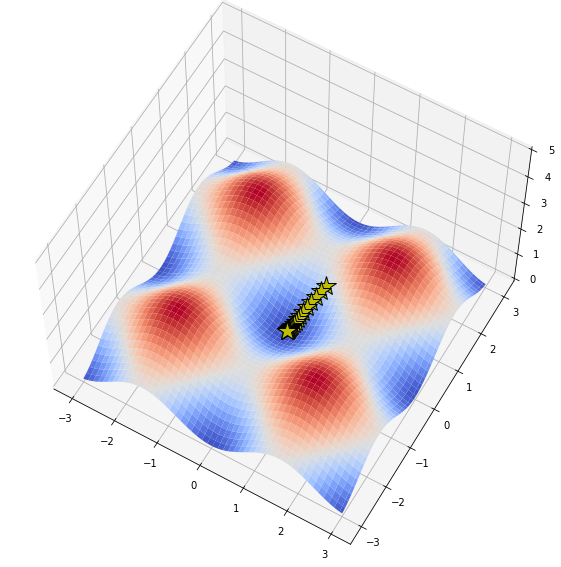

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(projection='3d')

zs = np.array([f(np.array([x,y]))
              for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)


ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='*', markersize=20, zorder=3, 
        markerfacecolor='y', lw=3, c='black')

ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

Посмотрим на график значений функции от шага

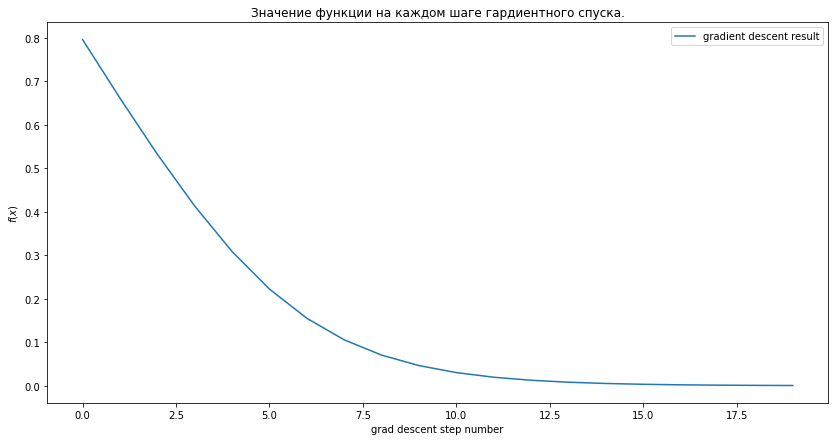

In [ ]:
plt.figure(figsize=(14,7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге гардиентного спуска.')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend()

# Генератор батчей

In [ ]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
    X_new = X.copy()
    y_new = y.copy()
    for i in range(len(perm)):
      X_new[i] = X[perm[i]]
      y_new[i] = y[perm[i]]
    
    for i in range(len(X) // batch_size):
      X_batch = X_new[i * batch_size : i * batch_size + batch_size]
      y_batch = y_new[i * batch_size : i * batch_size + batch_size]
      yield X_batch, y_batch

In [ ]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

X_reconstructed, y_reconstructed = [], []
for X_batch, y_batch in generate_batches(X_fake, y_fake, 10):
    X_reconstructed.append(X_batch)
    y_reconstructed.append(y_batch)

X_reconstructed = np.concatenate(X_reconstructed)
y_reconstructed = np.concatenate(y_reconstructed)

assert (X_fake != X_reconstructed).all(), "err!"
assert (y_fake != y_reconstructed).all(), "err!"

assert (np.sort(X_reconstructed, axis=0) == X_fake).all(), "err!"

X_batch [[83]
 [53]
 [70]
 [45]
 [44]
 [39]
 [22]
 [80]
 [10]
 [ 0]]
y_batch [1083 1053 1070 1045 1044 1039 1022 1080 1010 1000]
X_batch [[18]
 [30]
 [73]
 [33]
 [90]
 [ 4]
 [76]
 [77]
 [12]
 [31]]
y_batch [1018 1030 1073 1033 1090 1004 1076 1077 1012 1031]
X_batch [[55]
 [88]
 [26]
 [42]
 [69]
 [15]
 [40]
 [96]
 [ 9]
 [72]]
y_batch [1055 1088 1026 1042 1069 1015 1040 1096 1009 1072]
X_batch [[11]
 [47]
 [85]
 [28]
 [93]
 [ 5]
 [66]
 [65]
 [35]
 [16]]
y_batch [1011 1047 1085 1028 1093 1005 1066 1065 1035 1016]
X_batch [[49]
 [34]
 [ 7]
 [95]
 [27]
 [19]
 [81]
 [25]
 [62]
 [13]]
y_batch [1049 1034 1007 1095 1027 1019 1081 1025 1062 1013]
X_batch [[24]
 [ 3]
 [17]
 [38]
 [ 8]
 [78]
 [ 6]
 [64]
 [36]
 [89]]
y_batch [1024 1003 1017 1038 1008 1078 1006 1064 1036 1089]
X_batch [[56]
 [99]
 [54]
 [43]
 [50]
 [67]
 [46]
 [68]
 [61]
 [97]]
y_batch [1056 1099 1054 1043 1050 1067 1046 1068 1061 1097]
X_batch [[79]
 [41]
 [58]
 [48]
 [98]
 [57]
 [75]
 [32]
 [94]
 [59]]
y_batch [1079 1041 1058 1048

In [ ]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

num_batches = 0
for X_batch, y_batch in generate_batches(X_fake, y_fake, 7):
    num_batches += 1

assert num_batches == len(X_fake) // 7, "err!"

# Логистическая регрессия 


In [ ]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

In [ ]:
class MyLogisticRegression(object):
    def __init__(self):
        self.w = None
    
    def fit(self, X, y, epochs=10, lr=0.1, batch_size=100):
        n, k = X.shape        
        if self.w is None:
            np.random.seed(42)
            self.w = np.random.randn(k + 1)

        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        losses = []


        for i in range(epochs):
            for X_batch, y_batch in generate_batches(X_train, y, batch_size):
                predictions = self._predict_proba_internal(X_batch) 
                loss = self.__loss(y_batch, predictions)

                assert (np.array(loss).shape == tuple()), "Лосс должен быть скаляром!" 

                losses.append(loss)
                self.w -= lr * self.get_grad(X_batch, y_batch, predictions)

        return losses
    
    def get_grad(self, X_batch, y_batch, predictions):
        
        grad_basic = np.transpose(X_batch) @ (predictions - y_batch)
        assert grad_basic.shape == (X_batch.shape[1],) , "Градиенты должны быть столбцом из k_features + 1 элементов"

        return grad_basic
        
    def predict_proba(self, X):
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def _predict_proba_internal(self, X): 
        return sigmoid(logit(X, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def get_weights(self):
        return self.w.copy() 
      
    def __loss(self, y, p):  
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

In [ ]:
m = MyLogisticRegression()
X = np.array([[1, 3, 4], [1, -5, 6], [-3, 5, 3]])
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = np.array([1, 0, 1])
preds = np.array([.55, .22, .85])
grads = m.get_grad(X, y, preds) 
assert np.allclose(grads, np.array([-0.38,  0.22, -3.2 , -0.93])), "err!"

In [ ]:
grads

array([-0.38,  0.22, -3.2 , -0.93])

In [ ]:
np.random.seed(42)
m = MyLogisticRegression()
X = np.random.rand(100,3)
y = np.random.randint(0, 1, size=(100,))
preds = np.random.rand(100)
grads = m.get_grad(X, y, preds) 
assert np.allclose(grads, np.array([23.8698149, 25.27049356, 24.4139452])), "err!"

In [ ]:
grads

array([23.8698149 , 25.27049356, 24.4139452 ])

# Логистическая регрессия с $l_1$ и $l_2$ регуляризацией (elastic net).

In [ ]:
class MyElasticLogisticRegression(MyLogisticRegression):
    def __init__(self, l1_coef, l2_coef):
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.w = None
    
    def get_grad(self, X_batch, y_batch, predictions):
        grad_basic = np.transpose(X_batch) @ (predictions - y_batch)
        grad_l1 = self.l1_coef * np.sign(self.w)
        grad_l1[0] = 0
        grad_l2 = 2 * self.l2_coef * self.w 
        grad_l2[0] = 0
        
        assert grad_l1[0] == grad_l2[0] == 0, "Bias в регуляризационные слагаемые не входит!"
        assert grad_basic.shape == grad_l1.shape == grad_l2.shape == (X_batch.shape[1],) , "Градиенты должны быть столбцом из k_features + 1 элементов"
        
        return grad_basic + grad_l1 + grad_l2

In [ ]:
m = MyElasticLogisticRegression(.2,.2) 
X = np.array([[1, 3, 4], [1, -5, 6], [-3, 5, 3]])
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = np.array([1, 0, 1])
preds = np.array([.55, .22, .85])
m.w = np.array([1,1,1,1])
grads = m.get_grad(X, y, preds)
assert np.allclose(grads, np.array([-0.38,  0.82, -2.6 , -0.33])), "err!"


In [ ]:
np.random.seed(42)
m = MyElasticLogisticRegression(.2, .2)
X = np.random.rand(100,3)
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = np.random.randint(0, 1, size=(100,))
preds = np.random.rand(100)
m.w = np.array([1,1,1,1])
grads = m.get_grad(X, y, preds)
assert np.allclose(grads, np.array([49.11489408, 24.4698149, 25.87049356, 25.0139452])), "err!"


In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [ ]:
clf = MyElasticLogisticRegression(0.1, 0.1)
clf.fit(X, y, epochs=1000)
w = clf.get_weights()

In [ ]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)